In [1]:
import pandas as pd
instagram = pd.read_csv("instagram_global_top_1000.csv")
my_list = list(instagram)
instagram = instagram.drop(['Country', 'Scraped'], axis=1)
instagram.head()

,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg
0,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0
1,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0
2,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0
3,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0
4,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0


In [2]:
grouped_category = instagram.groupby("Category")["Rank"].count()
category_list = grouped_category.index.tolist()
count_list = []
for element in category_list:
    count = element.count("|")
    count_list.append(count)
max_categories = max(count_list) + 1
# max number of genres an influencer has
print(max_categories)
    
#print(category_list)

6


In [3]:
#add columns that have each category

instagram_w_categories = instagram.rename(columns={"Category": "Category 1"})
instagram_w_categories["Category 2"] = "N/A"
instagram_w_categories["Category 3"] = "N/A"
instagram_w_categories["Category 4"] = "N/A"
instagram_w_categories["Category 5"] = "N/A"
instagram_w_categories["Category 6"] = "N/A"
instagram_w_categories.head()

,Rank,Account,Title,Link,Category 1,Followers,Audience Country,Authentic engagement,Engagement avg,Category 2,Category 3,Category 4,Category 5,Category 6
0,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,N/A,N/A,N/A,N/A,N/A
1,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,N/A,N/A,N/A,N/A,N/A
2,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,N/A,N/A,N/A,N/A,N/A
3,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,N/A,N/A,N/A,N/A,N/A
4,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,N/A,N/A,N/A,N/A,N/A


In [4]:
index = 0
for string in instagram_w_categories["Category 1"].astype(str):
    num = string.count("|")
    while num >= 0:
        category_list = string.split("|")
        instagram_w_categories.loc[index, ["Category " + str(num + 1)]] = category_list[num].strip()
        num -= 1
    index += 1

In [18]:
grouped_category_1 = instagram_w_categories.groupby("Category 1").size()
grouped_category_2 = instagram_w_categories.groupby("Category 2").size()
grouped_category_3 = instagram_w_categories.groupby("Category 3").size()
grouped_category_4 = instagram_w_categories.groupby("Category 4").size()
grouped_category_5 = instagram_w_categories.groupby("Category 5").size()
grouped_category_6 = instagram_w_categories.groupby("Category 6").size()


combine = pd.concat([grouped_category_1, grouped_category_2, grouped_category_3, grouped_category_4, grouped_category_5, grouped_category_6])
print(combine.to_string())

instagram_w_categories.head()

Accessories             1
Adult content           7
Animals                 1
Art                    12
Beauty                 26
Business                4
Cars                    5
Cinema                209
Clothing                5
Computers               8
Extreme                 2
Family                 14
Fashion                10
Finance                 4
Fitness                11
Food                    2
Humor                  24
Kids                    1
Lifestyle              92
Literature              6
Luxury                  2
Machinery               1
Management              2
Modeling               37
Music                 244
Nature  landscapes      3
Photography             6
Racing                  6
Science                 2
Shows                  50
Sports with a ball    112
nan                    91
Actors/actresses      209
Adult content           1
Art                    18
Artists                12
Beauty                 12
Business                1
Careers     

,Rank,Account,Title,Link,Category 1,Followers,Audience Country,Authentic engagement,Engagement avg,Category 2,Category 3,Category 4,Category 5,Category 6
0,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,N/A,N/A,N/A,N/A,N/A
1,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion,308800000.0,United States,6200000.0,10100000.0,Modeling,Beauty,N/A,N/A,N/A
2,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball,306300000.0,Argentina,4800000.0,6500000.0,Family,N/A,N/A,N/A,N/A
3,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling,217800000.0,United States,3400000.0,5400000.0,Fashion,N/A,N/A,N/A,N/A
4,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music,295800000.0,United States,2700000.0,3600000.0,Lifestyle,N/A,N/A,N/A,N/A


In [21]:
combine.sort_values(ascending = False)[:15]

N/A                   997
N/A                   979
N/A                   923
N/A                   778
N/A                   494
Music                 244
Cinema                209
Actors/actresses      209
Sports with a ball    112
Lifestyle              92
nan                    91
Actors/actresses       52
Cinema                 52
Shows                  50
Modeling               37
dtype: int64

In [7]:
country_cat_piv  = instagram_w_categories.groupby(["Audience Country","Category 1"])["Account"].count().unstack(fill_value=None).reset_index().rename_axis(None, axis=1)
display(country_cat_piv)

,Audience Country,Accessories,Adult content,Animals,Art,Beauty,Business,Cars,Cinema,Clothing,...,Management,Modeling,Music,Nature landscapes,Photography,Racing,Science,Shows,Sports with a ball,nan
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,14.0,NaN,NaN,NaN,NaN,1.0,5.0,2.0
2,Brazil,NaN,1.0,NaN,2.0,5.0,NaN,NaN,38.0,NaN,...,1.0,9.0,39.0,NaN,NaN,1.0,NaN,9.0,16.0,11.0
3,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN
6,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7,France,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN
8,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
9,India,NaN,1.0,1.0,2.0,4.0,2.0,1.0,66.0,NaN,...,NaN,4.0,16.0,NaN,1.0,NaN,1.0,4.0,13.0,5.0


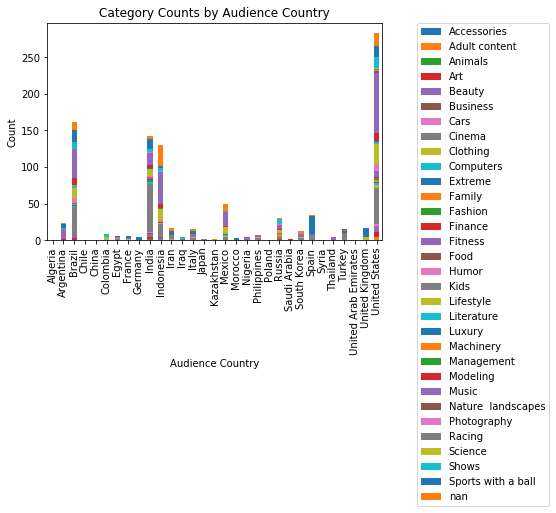

In [8]:
import matplotlib.pyplot as plt
country_cat_piv.plot(kind='bar', x="Audience Country", stacked=True)
plt.xlabel("Audience Country")
plt.ylabel("Count")
plt.title("Category Counts by Audience Country") 
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0)

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

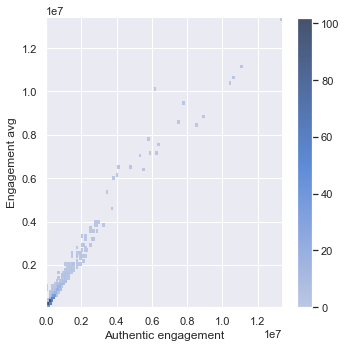

In [12]:
sns.displot(data=instagram_w_categories, x="Authentic engagement", y="Engagement avg", cbar=True)

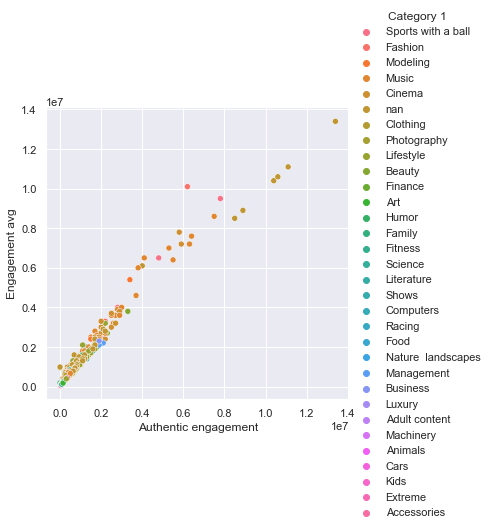

In [15]:
sns.relplot(x="Authentic engagement",y="Engagement avg", hue = "Category 1", data=instagram_w_categories)

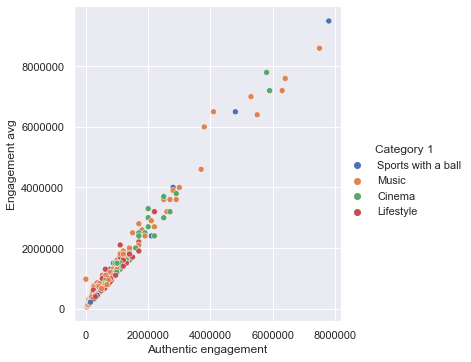

In [22]:
mask = instagram_w_categories[(instagram_w_categories["Category 1"]=='Music')|(instagram_w_categories["Category 1"]=='Cinema')|(instagram_w_categories["Category 1"]=='Actor/actresses')|(instagram_w_categories["Category 1"]=='Sports with a ball')|(instagram_w_categories["Category 1"]=='Lifestyle')]

sns.relplot(x="Authentic engagement",y="Engagement avg", hue = "Category 1", data=mask)

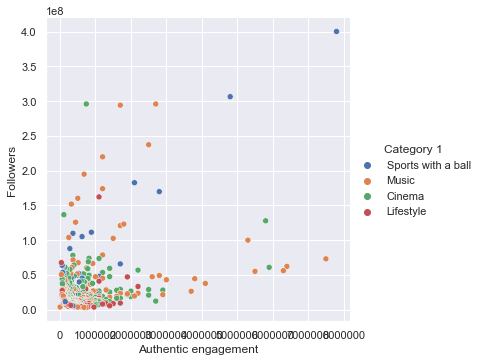

In [30]:
sns.relplot(x="Authentic engagement",y="Followers", hue = "Category 1", data=mask)

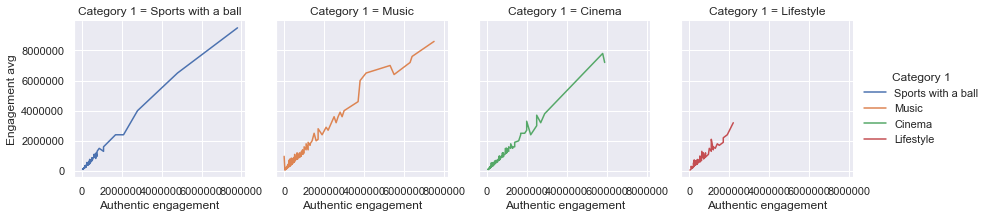

In [25]:
sns.relplot(x='Authentic engagement',y='Engagement avg', col= "Category 1", hue = 'Category 1', height =3,estimator = None, kind = 'line', data = mask)




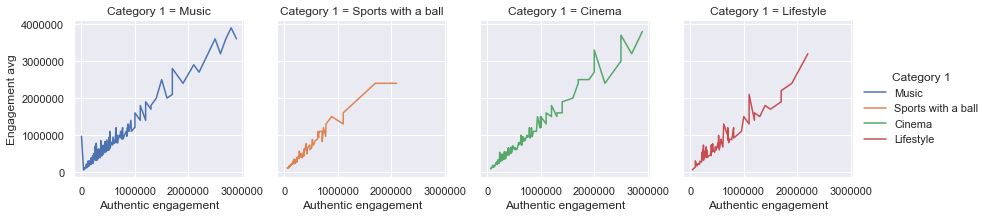

In [26]:
less = mask[(mask["Authentic engagement"]< 4000000)&(mask["Engagement avg"]< 4000000)]
sns.relplot(x='Authentic engagement',y='Engagement avg', col= "Category 1", hue = 'Category 1', height =3,estimator = None, kind = 'line', data = less)



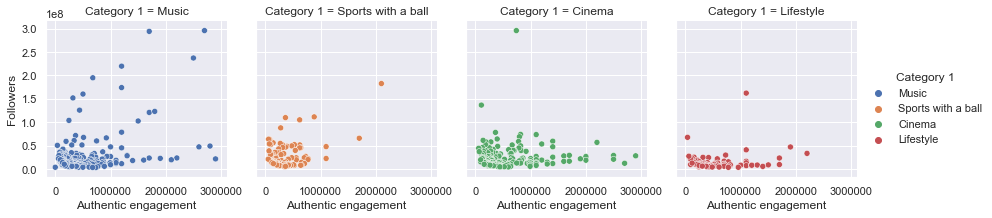

In [32]:
sns.relplot(x='Authentic engagement',y='Followers', col= "Category 1", hue = 'Category 1', height =3,estimator = None, data = less)


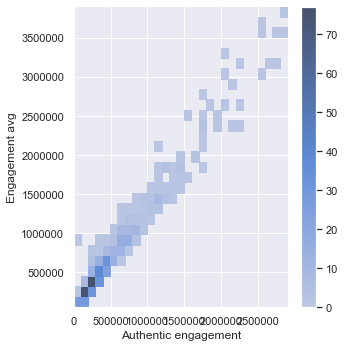

In [27]:
sns.displot(data=less, x="Authentic engagement", y="Engagement avg", cbar=True)